# **Class Imbalanced**

## **Introduction**

**What is Class Imbalanced ?**

* <mark style = 'background-color : powderblue'> **Class imbalance often appear in machine learing that refers to a scenario in classification problems where the distribution of classes is not uniform** </mark>
*  Imbalanced datasets are those where there is a severe skew in the class distribution, For example, in a dataset for fraud detection, there might be only 1% fraudulent transactions and 99% non-fraudulent transactions
* Imbalanced datasets apply to many types of models, including binary classification, multiclass classification, multilabel classification, and regression

**Why Imbalanced Class is Problem**

1. Bias Towards Majority Class: Algorithms tend to be biased towards the majority class due to its overwhelming presence in the training data.

2. Inaccurate Metrics: Metrics like accuracy can be misleading in imbalanced scenarios. For example, a model could be 99% accurate by predicting only the majority class, but this would ignore the minority class entirely.

3. Underrepresentation of Minority Class: The minority class, which may represent critical outcomes, is underrepresented, leading to poor model performance in predicting those classes.

**Imbalanced class handling technique**

There are several approaches to solving class imbalance problem before starting classification, such as:

1. More samples from the minority class(es) should be acquired from the knowledge domain.

2. Changing the loss function to give the failing minority class a higher cost.

3. Oversampling the minority class.

4. Undersampling the majority class.

5. Any combination of previous approaches.

> The rule of thumb is: never mess up with your test set. Always split into test and train sets BEFORE trying oversampling/undersampling techniques!



## **Metrics for Imbalanced**

**Why we need consider evaluation metric while facing imbalanced dataset**

<mark style = 'background-color : powderblue'>**1. Accuracy Can Be Misleading** : </mark>
* In a dataset with 95% instances of the majority class and 5% of the minority class, a model that always predicts the majority class will achieve 95% accuracy, despite never identifying any minority class samples correctly. This gives a false sense of performance

<mark style = 'background-color : powderblue'>**2. Focus on Minority Class:**</mark>
* In many imbalanced scenarios, the minority class is more critical to predict accurately (e.g., fraud detection, disease diagnosis, defect detection in manufacturing). Evaluating the performance for this class requires specific metrics.

<mark style = 'background-color : powderblue'> **3. Different Types of Errors Matter:**</mark>
* Imbalanced datasets can lead to different types of errors, such as many false negatives for the minority class. Metrics like precision, recall, and F1-score help to identify how well the model is doing with respect to correctly identifying minority class instances.

**Common metrics used for imbalanced data**

<mark style = 'background-color : powderblue'>**The most common metrics to use for imbalanced datasets are**:</mark>

1. F1 score
2. Precision
3. Recall
4. AUC score (AUC ROC)
5. Average precision score (AP)
6. G-Mean

<mark style = 'background-color : powderblue'>**Choosing metric for imbalanced data**</mark>

<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/metric_imbalanced.png" alt="pict2" >
</p>

## **Dataset**

in this notebook, we will you fraud detection dataset. you can access the dataset through this link : [Credit Card Fraud Detection](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud?select=creditcard.csv)

* This is the Dictionary of Features of dataset :

    * Time : Number of seconds elapsed between this transaction and the first transaction in the dataset

    * V1 : may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)

    * amount : Transaction amount

    * Class : 1 for fraudulent transactions, 0 otherwise



## **Check Imbalanced Class**
in this notebook, we will evaluate imbalanced class feature

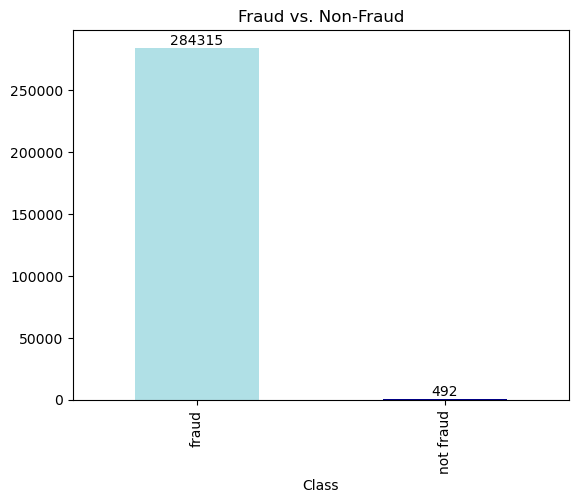

Proportion of each class:
Class
0    99.83%
1     0.17%
Name: count, dtype: object


In [174]:
import pandas as pd
import matplotlib.pyplot as plt

dataset = pd.read_csv('/Users/Shared/Cloud Drive/repo_adi/dataset/creditcard.csv')
dataset.head().style.background_gradient(cmap='Blues')

# check data proportion on Class Feature
class_counts = dataset['Class'].value_counts()
class_counts.plot(kind='bar',color=['powderblue','darkblue'], title='Fraud vs. Non-Fraud')
plt.xticks(ticks=dataset['Class'].unique(),labels=['fraud','not fraud'])

# adding label counts
for i, count in enumerate(class_counts):
    plt.text(i, count + 10, str(count), ha='center', va='bottom', fontsize=10)

plt.show()

print("====="*30)

percentage_class = class_counts/sum(class_counts)
print(f'Proportion of each class:\n{percentage_class.map(lambda x: "{:.2%}".format(x))}')


notice, data on feature class is very imbalanced. as a fraud transaction becomes a strong majority and others is a minority. for this notebook, we also skip data pre-processing such as : missing handling values, data normalization, and standardization steps :)

Now, let's talk about some technique that can be used to handle imbalanced data. Before we implement any technique, let's make a sample and train test data and a decision tree model in order to evaluate our effectiveness of data transformation techniques.

## **Model for Class Imbalanced Evaluation**

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

model = DecisionTreeClassifier()
X_train, X_test, y_train, y_test = train_test_split(dataset.drop(columns=['Class']), dataset['Class'], test_size=0.30, random_state=42)

# fit the model
model_fit = model.fit(X_train, y_train)

y_pred = model_fit.predict(X_test)


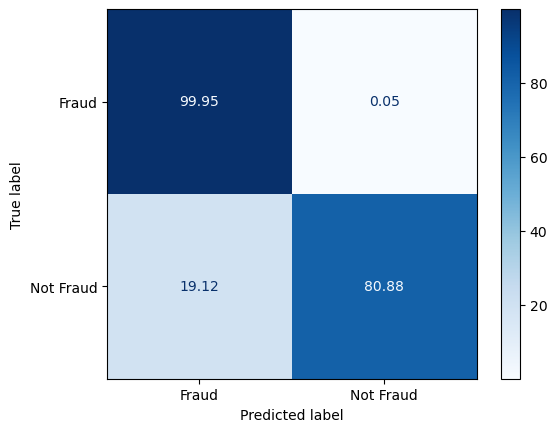

In [111]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
import numpy as np

cm = confusion_matrix(y_true=y_test, y_pred=y_pred)

# Normalize confusion matrix to get percentages
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100

disp_cm = ConfusionMatrixDisplay(cm_normalized, display_labels=np.where(model.classes_ == 0, 'Fraud', 'Not Fraud'))
disp_cm.plot(cmap='Blues', values_format='.2f')

# print 

## **Handling Imbalanced Data**

### 1. Random - Undersampling Method

<mark style = "background-color : powderblue">**Downsampling is a solution for handling imbalanced datasets by changing the underlying dataset, rather than the model**</mark>. With downsampling, we decrease the number of examples from the majority class used during model training.

you can do manually or using packages while conducting undersampling. but in this notebook, we will work undersampling with packages :   <mark style = 'background-color : powderblue'>**imblearn.under_sampling**</mark>


**How undersampling works**
* In an imbalanced dataset, the majority class has significantly more samples than the minority class. <mark style = 'background-color : powderblue'>**Downsampling involves randomly removing or discarding some of the majority class samples until the size of the majority class is reduced to match or come closer to the size of the minority class**.</mark>
<p align="center">
    <img src= "https://raw.githubusercontent.com/adisetiawannn/datascience_python/main/images/undersampling.png" alt="pict2" >
</p>

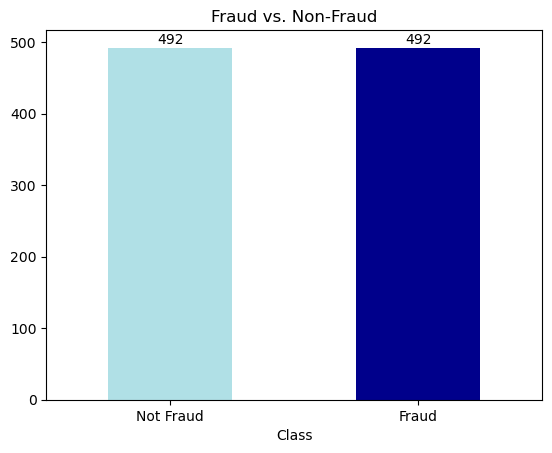

Class
0    0.5
1    0.5
Name: proportion, dtype: float64

In [173]:
# Import necessary libraries
from imblearn.under_sampling import RandomUnderSampler
import pandas as pd
import matplotlib.pyplot as plt

# Define the undersample strategy
raw_data_class = dataset['Class'].copy()  # Target column (Class)
raw_data = dataset.drop(columns=['Class'])  # Feature columns

# Initialize the RandomUnderSampler with a strategy to undersample the majority class
undersample = RandomUnderSampler(sampling_strategy='majority')

# Apply undersampling
X_undersample, y_undersample = undersample.fit_resample(raw_data, raw_data_class)

# Combine the resampled data back into a DataFrame
data_undersample = pd.concat([pd.DataFrame(X_undersample, columns=raw_data.columns), 
                              pd.DataFrame(y_undersample, columns=['Class'])], axis=1)

# Plot the distribution of 'Class' after undersampling
class_counts = data_undersample['Class'].value_counts()

# Bar plot
class_counts.plot(kind='bar', color=['powderblue', 'darkblue'], title='Fraud vs. Non-Fraud')
plt.xticks(ticks=[0, 1], labels=['Not Fraud', 'Fraud'], rotation=0)

# Add label counts on top of the bars
for i, count in enumerate(class_counts):
    plt.text(i, count + 2, str(count), ha='center', va='bottom', fontsize=10)

# Show the plot
plt.show()

print("====="*30)

# Display the class distribution in percentage
data_undersample['Class'].value_counts(normalize=True)


### 1.2 Random - Undersampling over Decision Tree Model

              precision    recall  f1-score   support

           0       0.93      0.92      0.92       148
           1       0.92      0.93      0.92       148

    accuracy                           0.92       296
   macro avg       0.92      0.92      0.92       296
weighted avg       0.92      0.92      0.92       296



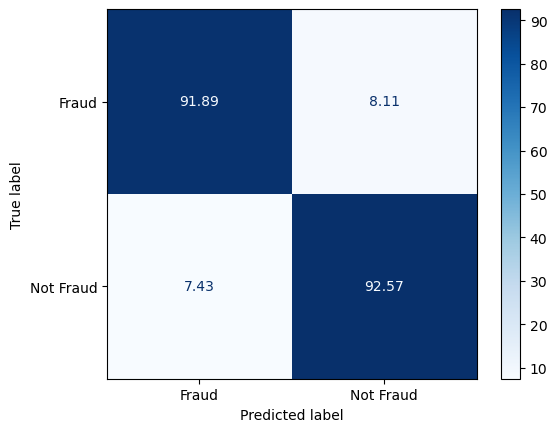

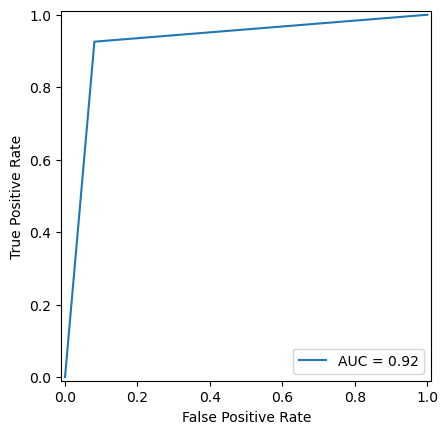

In [186]:
# import packages
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay, roc_curve, RocCurveDisplay,auc, f1_score

# isolate target and feature undersampling dataset
y_undersample = data_undersample['Class']
X_undersample = data_undersample.drop(columns=['Class'],axis=1)

# split undersampling dataset to train and test dataset
X_under_tr,X_under_test, y_under_tr, y_under_test = train_test_split(X_undersample, y_undersample, test_size=0.3, random_state=42, stratify=y_undersample)

# build the model
tree = DecisionTreeClassifier()
tree_model = tree.fit(X_under_tr, y_under_tr)
y_under_pred = tree_model.predict(X_under_test)

# evaluate the model
cm = confusion_matrix(y_under_test, y_under_pred)
cm_normalized = cm.astype(float) / cm.sum(axis=1)[:, np.newaxis] * 100
disp_cm = ConfusionMatrixDisplay(cm_normalized, display_labels=np.where(tree_model.classes_ == 0, 'Fraud', 'Not Fraud'))
disp_cm.plot(cmap='Blues', values_format='.2f')

# print classification report
print(classification_report(y_under_test, y_under_pred))


# plot roc-auc curve
fpr, tpr, thresholds = roc_curve(y_under_test, y_under_pred)
roc_auc_under = auc(fpr, tpr)
display_roc_under = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc = roc_auc_under)
display_roc_under.plot()

# **Reference**

1. Best Technique and Metrics for Imbalanced Dataset - Marcin Rutecki :  [Metrics for imbalanced data](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#1.-Introduction)

2. Machine Learning Design Patterns - Book by Michael Munn, Sara Robinson, and Valliappa Lakshmana